In [125]:
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt, cv2, keras, seaborn

from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [126]:
(X, y), (X_test, y_test) = mnist.load_data()

In [127]:
print(f'X : {X.shape}\ny : {y.shape}\n\nX test: {X_test.shape}\ny test: {y_test.shape}')

X : (60000, 28, 28)
y : (60000,)

X test: (10000, 28, 28)
y test: (10000,)


In [128]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

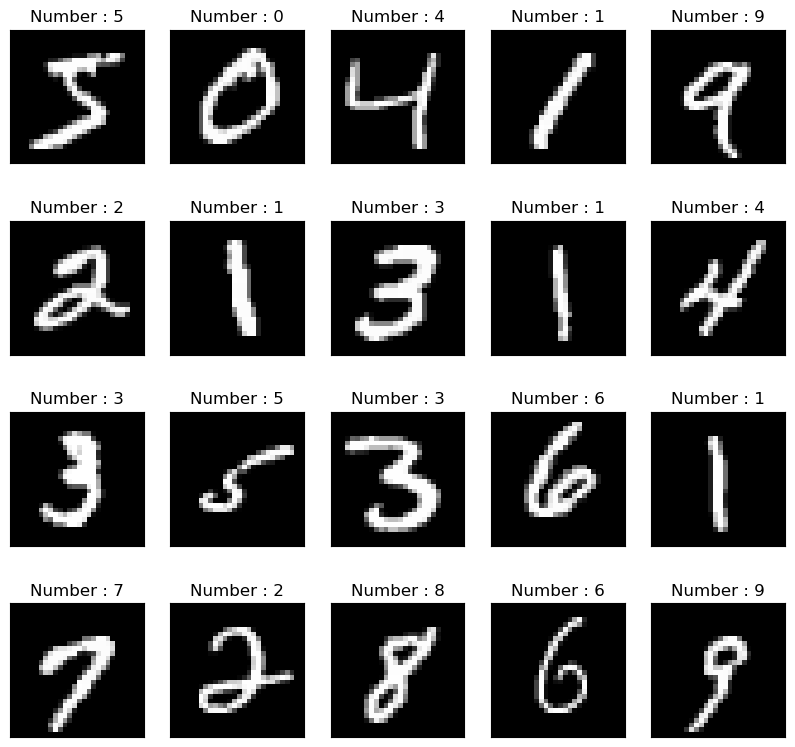

In [129]:
# plt.imshow(X_train[0], cmap=plt.cm.binary)
# plt.xticks([])
# plt.yticks([])
# print(y[0])

# cv2.imshow('image', x[0])
# cv2.waitKey(0) 

plt.figure(figsize=(10, 12))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.title(f'Number : {y[i]}')
    plt.xticks([])
    plt.yticks([])
    plt.plot()

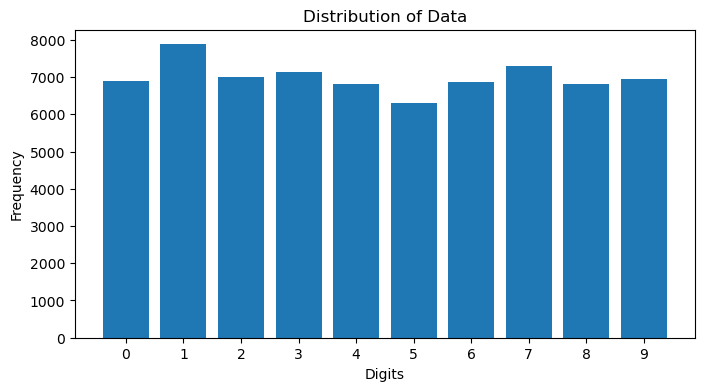

In [130]:
combine_data = np.concatenate((y, y_test))

count = np.bincount(combine_data)

plt.figure(figsize=(8, 4))
plt.bar(x=np.arange(10), height=count)
plt.xticks(ticks=np.arange(10), labels=np.arange(10))
plt.title("Distribution of Data")
plt.xlabel("Digits")
plt.ylabel("Frequency")
plt.show()

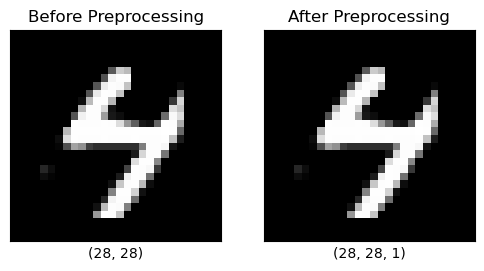

In [131]:
def image_preprocessing(image):
    image = cv2.resize(image, (28, 28))
    # image = cv2.equalizeHist(image)
    image = image / 255.0
    image = image.reshape(28, 28, 1)        
    return image

target = X[991]

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title('Before Preprocessing')
plt.xlabel(f'{target.shape}')
plt.imshow(target, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.title('After Preprocessing')
target_pre = image_preprocessing(target)
plt.xlabel(f'{target_pre.shape}')
plt.imshow(target_pre, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [132]:
def preprocess_mnist_images(images):
    return np.array([image_preprocessing(img) for img in images])

X = np.array([image_preprocessing(img) for img in X])
X_test = np.array([image_preprocessing(img) for img in X_test])

In [133]:
X.shape

(60000, 28, 28, 1)

In [134]:
dataGen = ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, zoom_range=.2, shear_range=.1, rotation_range=10)

dataGen.fit(X)

In [135]:
y_encode = to_categorical(y, 10)
y_test_encode = to_categorical(y_test, 10)

In [136]:
# Train data split
X_train, X_val, y_train, y_val = train_test_split(X, y_encode, test_size=.1, random_state=42, stratify=y_encode)

In [137]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(.25),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 128)       

In [138]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
history = model.fit_generator(dataGen.flow(X_train, y_train), epochs=10, steps_per_epoch=500, validation_data=(X_val, y_val), shuffle=1)    

Epoch 1/10


C:\Users\User\AppData\Local\Temp\ipykernel_13468\1737172700.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(dataGen.flow(X_train, y_train), epochs=10, steps_per_epoch=500, validation_data=(X_val, y_val), shuffle=1)


500/500 [==============================] - 16s 31ms/step - loss: 1.0171 - accuracy: 0.6618 - val_loss: 0.2298 - val_accuracy: 0.9288
Epoch 2/10
500/500 [==============================] - 15s 31ms/step - loss: 0.4513 - accuracy: 0.8600 - val_loss: 0.1511 - val_accuracy: 0.9522
Epoch 3/10
500/500 [==============================] - 16s 31ms/step - loss: 0.3401 - accuracy: 0.8980 - val_loss: 0.1257 - val_accuracy: 0.9602
Epoch 4/10
500/500 [==============================] - 17s 33ms/step - loss: 0.2845 - accuracy: 0.9156 - val_loss: 0.1120 - val_accuracy: 0.9673
Epoch 5/10
500/500 [==============================] - 16s 32ms/step - loss: 0.2521 - accuracy: 0.9226 - val_loss: 0.0818 - val_accuracy: 0.9743
Epoch 6/10
500/500 [==============================] - 16s 32ms/step - loss: 0.2225 - accuracy: 0.9356 - val_loss: 0.0919 - val_accuracy: 0.9708
Epoch 7/10
500/500 [==============================] - 16s 31ms/step - loss: 0.2085 - accuracy: 0.9370 - val_loss: 0.0732 - val_accuracy: 0.9792
Epo

In [140]:
model.save('./num_classifier.h5')

In [141]:
model = tf.keras.models.load_model('./num_classifier.h5')

In [142]:
model.evaluate(X_test, y_test_encode)

313/313 [==============================] - 2s 5ms/step - loss: 0.0553 - accuracy: 0.9825


[0.05533807352185249, 0.9825000166893005]

In [143]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 4ms/step


<Axes: >

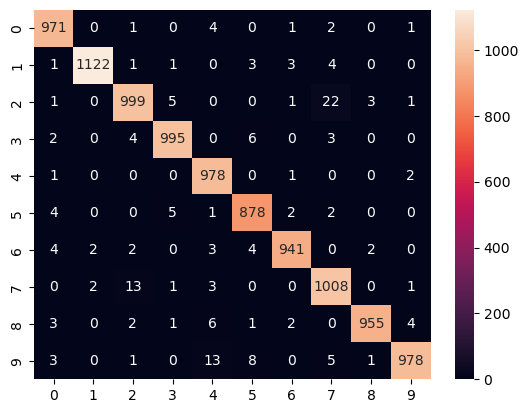

In [144]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
seaborn.heatmap(confusion_matrix, annot=True, fmt='d')

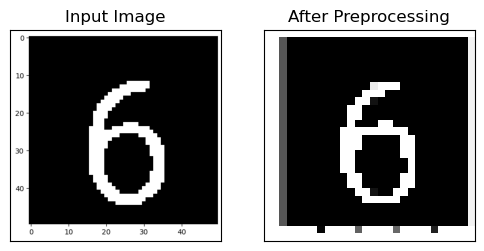

1/1 [==============================] - 0s 38ms/step
Prediction: [6]


In [145]:
def image_preprocessing_input(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (28, 28))
    image = image/255.0
    image = image.reshape(1, 28, 28, 1,)
    return image

test_image = cv2.imread('./output_6.png')
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(test_image, cmap='gray')
plt.xticks([])
plt.yticks([])

test_image_preprocessed = image_preprocessing_input(test_image)
test_image_preprocessed.shape
plt.subplot(1, 2, 2)
plt.title('After Preprocessing')
plt.imshow(test_image_preprocessed.reshape(28, 28), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

y_pred = model.predict(test_image_preprocessed)
y_pred_labels = [np.argmax(i) for i in y_pred] 
print(f'Prediction: {y_pred_labels}')